# 1、BatchNorm
BatchNorm、LayerNorm 和 GroupNorm 都是深度学习中常用的归一化方式。

它们通过将输入归一化到均值为 0 和方差为 1 的分布中，来防止梯度消失和爆炸，并提高模型的泛化能力。

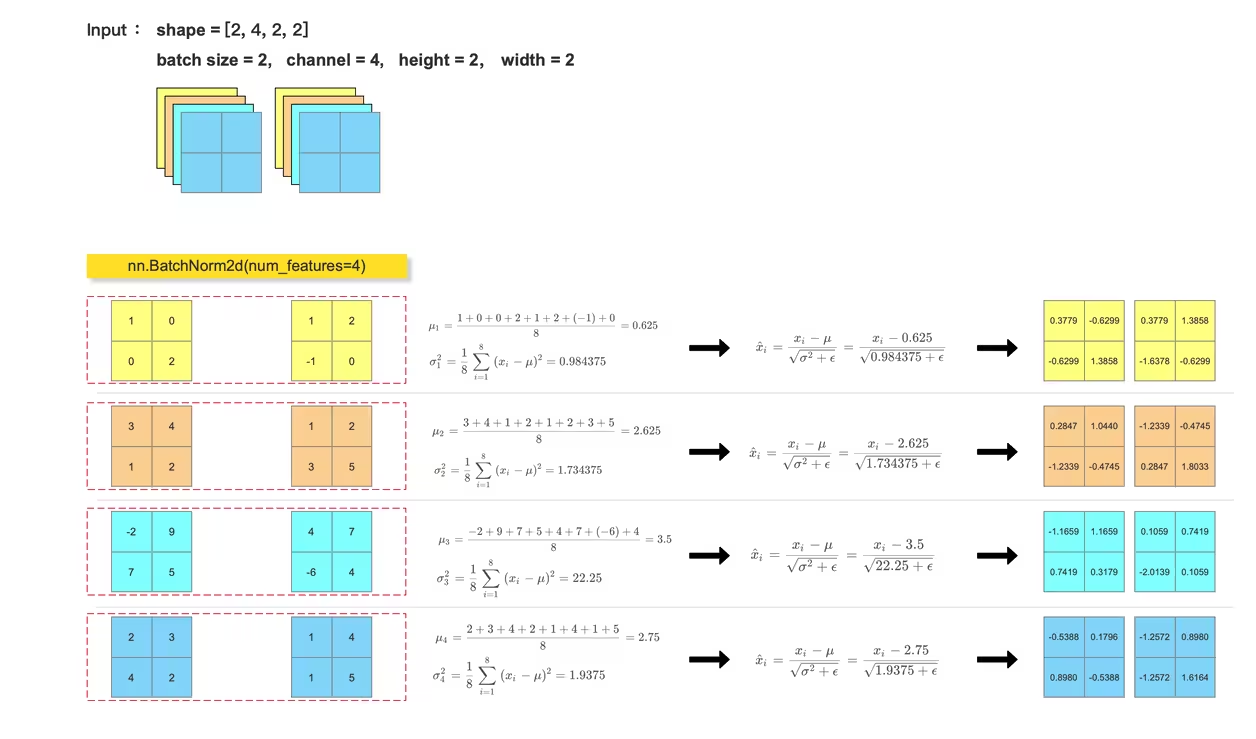

In [ ]:
# 对比手动计算的 BN层输出结果 和 调用 nn.BatchNorm()  的输出结果
import torch
import torch.nn as nn
import numpy as np

feature_array = np.array([[[[1, 0],  [0, 2]],
                           [[3, 4],  [1, 2]],
                           [[-2, 9], [7, 5]],
                           [[2, 3],  [4, 2]]],

                          [[[1, 2],  [-1, 0]],
                            [[1, 2], [3, 5]],
                            [[4, 7], [-6, 4]],
                            [[1, 4], [1, 5]]]], dtype=np.float32)

feature_tensor = torch.tensor(feature_array.copy(), dtype=torch.float32)
bn_out = nn.BatchNorm2d(num_features=4, eps=1e-5)(feature_tensor)
print(bn_out)

for i in range(feature_array.shape[1]):
    channel = feature_array[:, i, :, :]
    mean = feature_array[:, i, :, :].mean()
    var = feature_array[:, i, :, :].var()
    print(mean)
    print(var)

    feature_array[:, i, :, :] = (feature_array[:, i, :, :] - mean) / np.sqrt(var + 1e-5)
print(feature_array)

# 2、LayerNorm
Transformer block 中会使用到 LayerNorm ， 一般输入尺寸形为 ：（batch_size, token_num, dim），会在最后一个维度做 归一化： nn.LayerNorm(dim) 

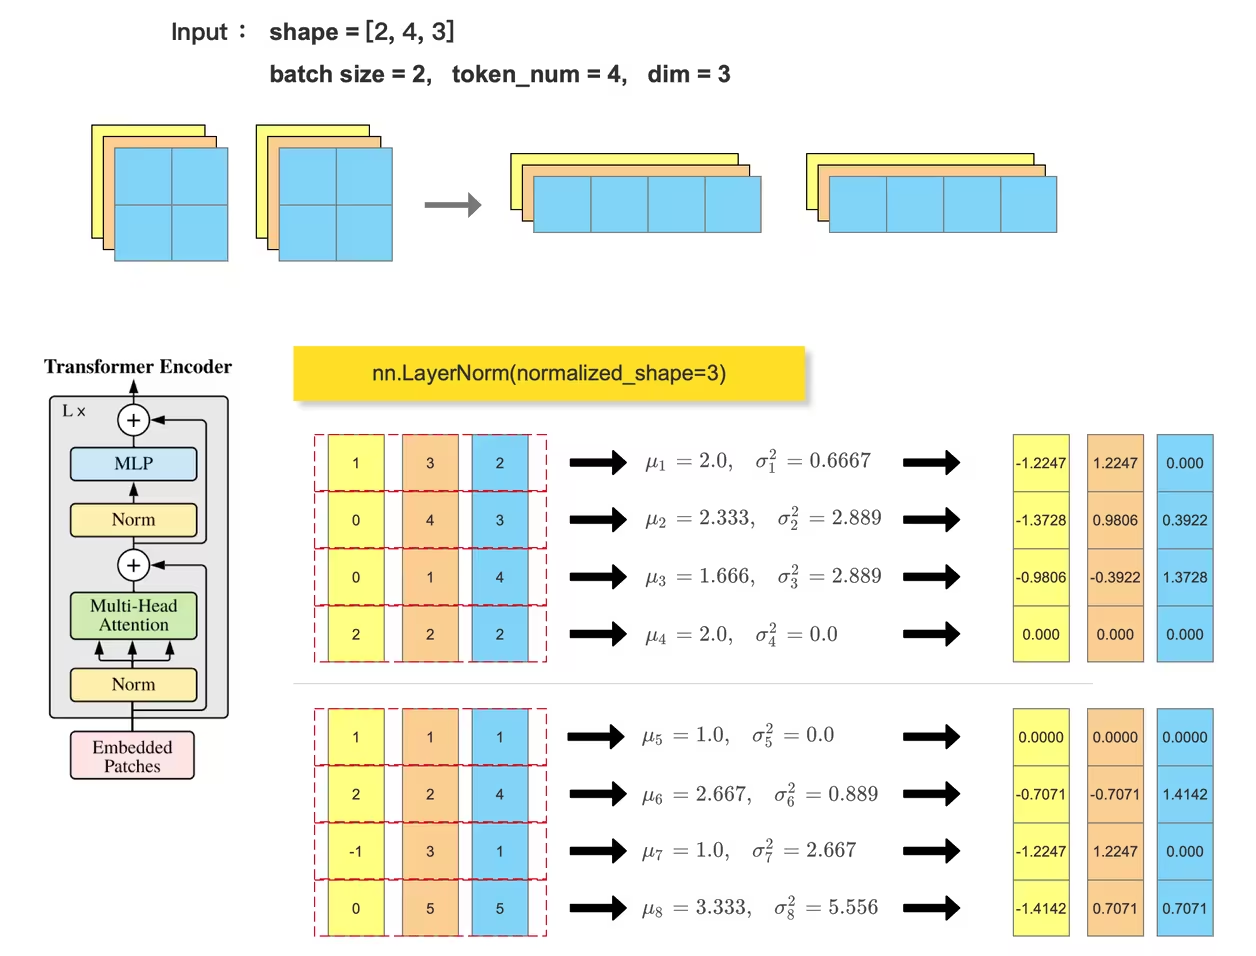

In [ ]:
# 对比手动计算的 LN层输出结果 和 调用 nn.LayerNorm()  的输出结果
import torch
import torch.nn as nn
import numpy as np

feature_array = np.array([[[[1, 0],  [0, 2]],
                           [[3, 4],  [1, 2]],
                           [[2, 3],  [4, 2]]],

                          [[[1, 2],  [-1, 0]],
                            [[1, 2], [3, 5]],
                            [[1, 4], [1, 5]]]], dtype=np.float32)


feature_array = feature_array.reshape((2, 3, -1)).transpose(0, 2, 1)
feature_tensor = torch.tensor(feature_array.copy(), dtype=torch.float32)

ln_out = nn.LayerNorm(normalized_shape=3)(feature_tensor)
print(ln_out)

b, token_num, dim = feature_array.shape
feature_array = feature_array.reshape((-1, dim))
for i in range(b*token_num):
    mean = feature_array[i, :].mean()
    var = feature_array[i, :].var()
    print(mean)
    print(var)

    feature_array[i, :] = (feature_array[i, :] - mean) / np.sqrt(var + 1e-5)
print(feature_array.reshape(b, token_num, dim))

# 3、GroupNorm
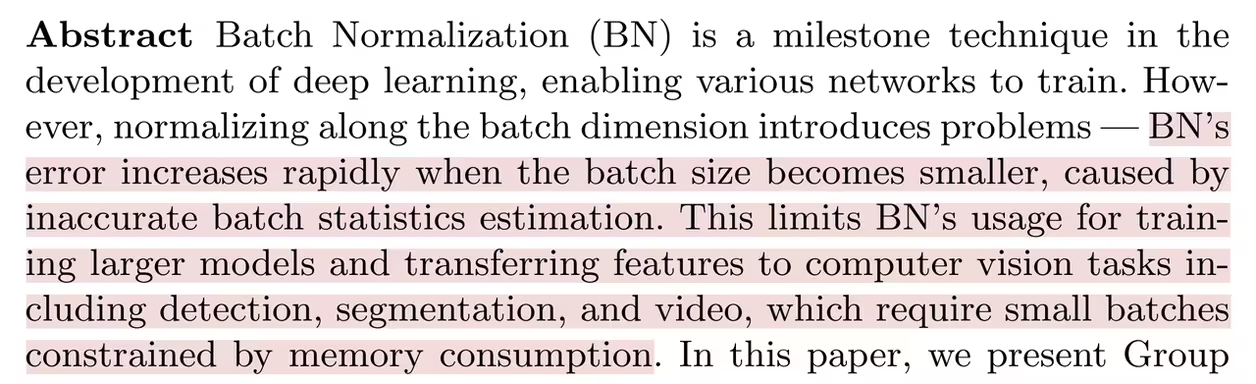

batch size 过大或过小都不适合使用 BN，而是使用 GN。

（1）当 batch size 过大时，BN 会将所有数据归一化到相同的均值和方差。这可能会导致模型在训练时变得非常不稳定，并且很难收敛。

（2）当 batch size 过小时，BN 可能无法有效地学习数据的统计信息。

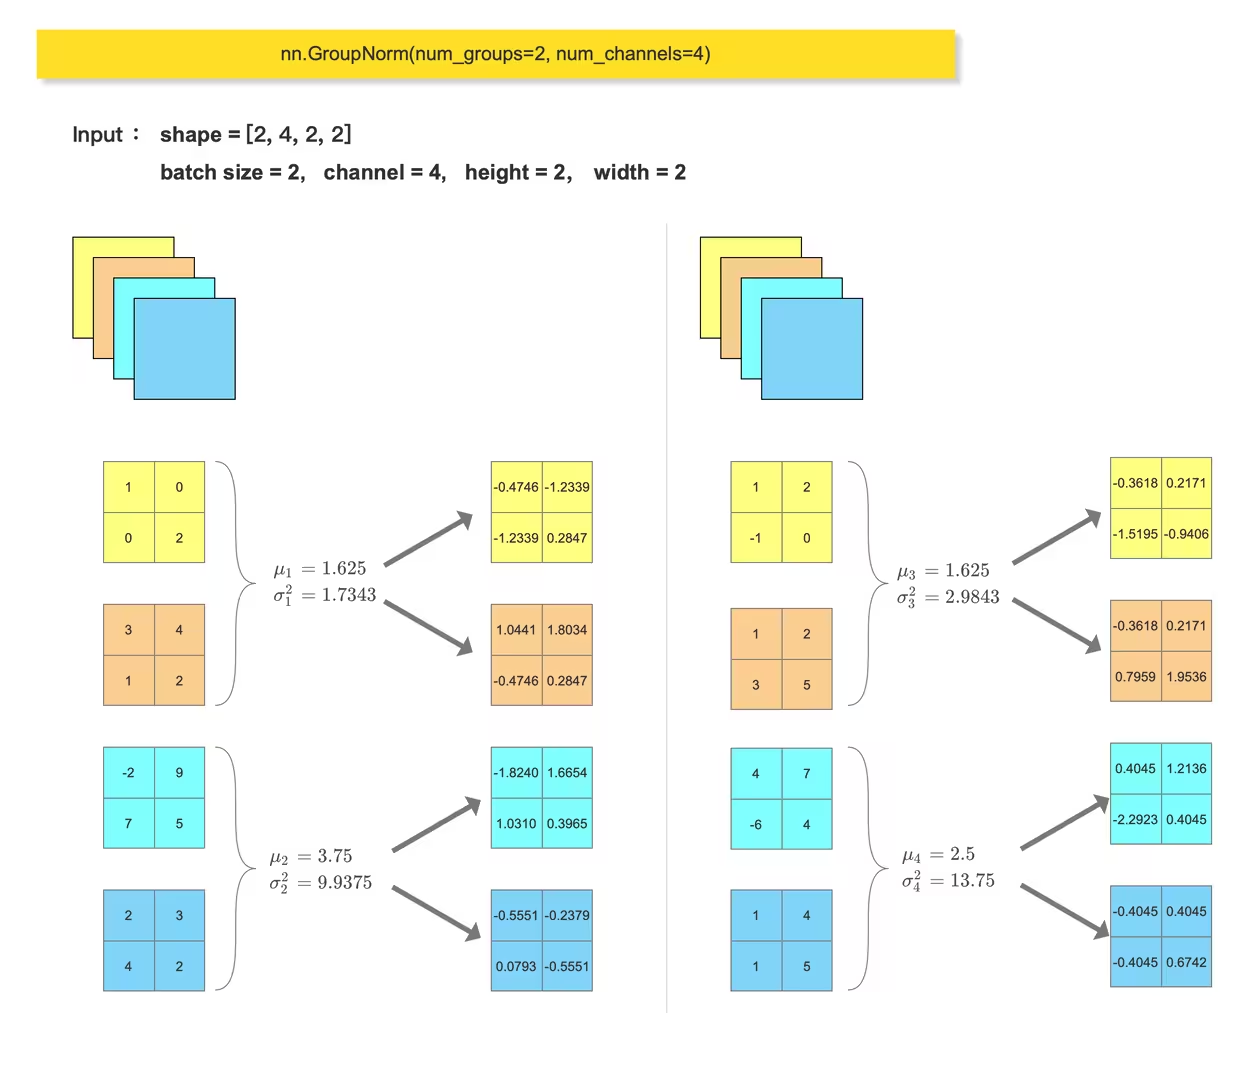

In [ ]:
# 对比手动计算的 GN层输出结果 和 调用 nn.GroupNorm() 的输出结果
import torch
import torch.nn as nn
import numpy as np

feature_array = np.array([[[[1, 0],  [0, 2]],
                           [[3, 4],  [1, 2]],
                           [[-2, 9], [7, 5]],
                           [[2, 3],  [4, 2]]],

                          [[[1, 2],  [-1, 0]],
                            [[1, 2], [3, 5]],
                            [[4, 7], [-6, 4]],
                            [[1, 4], [1, 5]]]], dtype=np.float32)

feature_tensor = torch.tensor(feature_array.copy(), dtype=torch.float32)
gn_out = nn.GroupNorm(num_groups=2, num_channels=4)(feature_tensor)
print(gn_out)

feature_array = feature_array.reshape((2, 2, 2, 2, 2)).reshape((4, 2, 2, 2))

for i in range(feature_array.shape[0]):
    channel = feature_array[i, :, :, :]
    mean = feature_array[i, :, :, :].mean()
    var = feature_array[i, :, :, :].var()
    print(mean)
    print(var)

    feature_array[i, :, :, :] = (feature_array[i, :, :, :] - mean) / np.sqrt(var + 1e-5)
feature_array = feature_array.reshape((2, 2, 2, 2, 2)).reshape((2, 4, 2, 2))
print(feature_array)

附

nn.LayerNorm 参数 num_features 的使用 

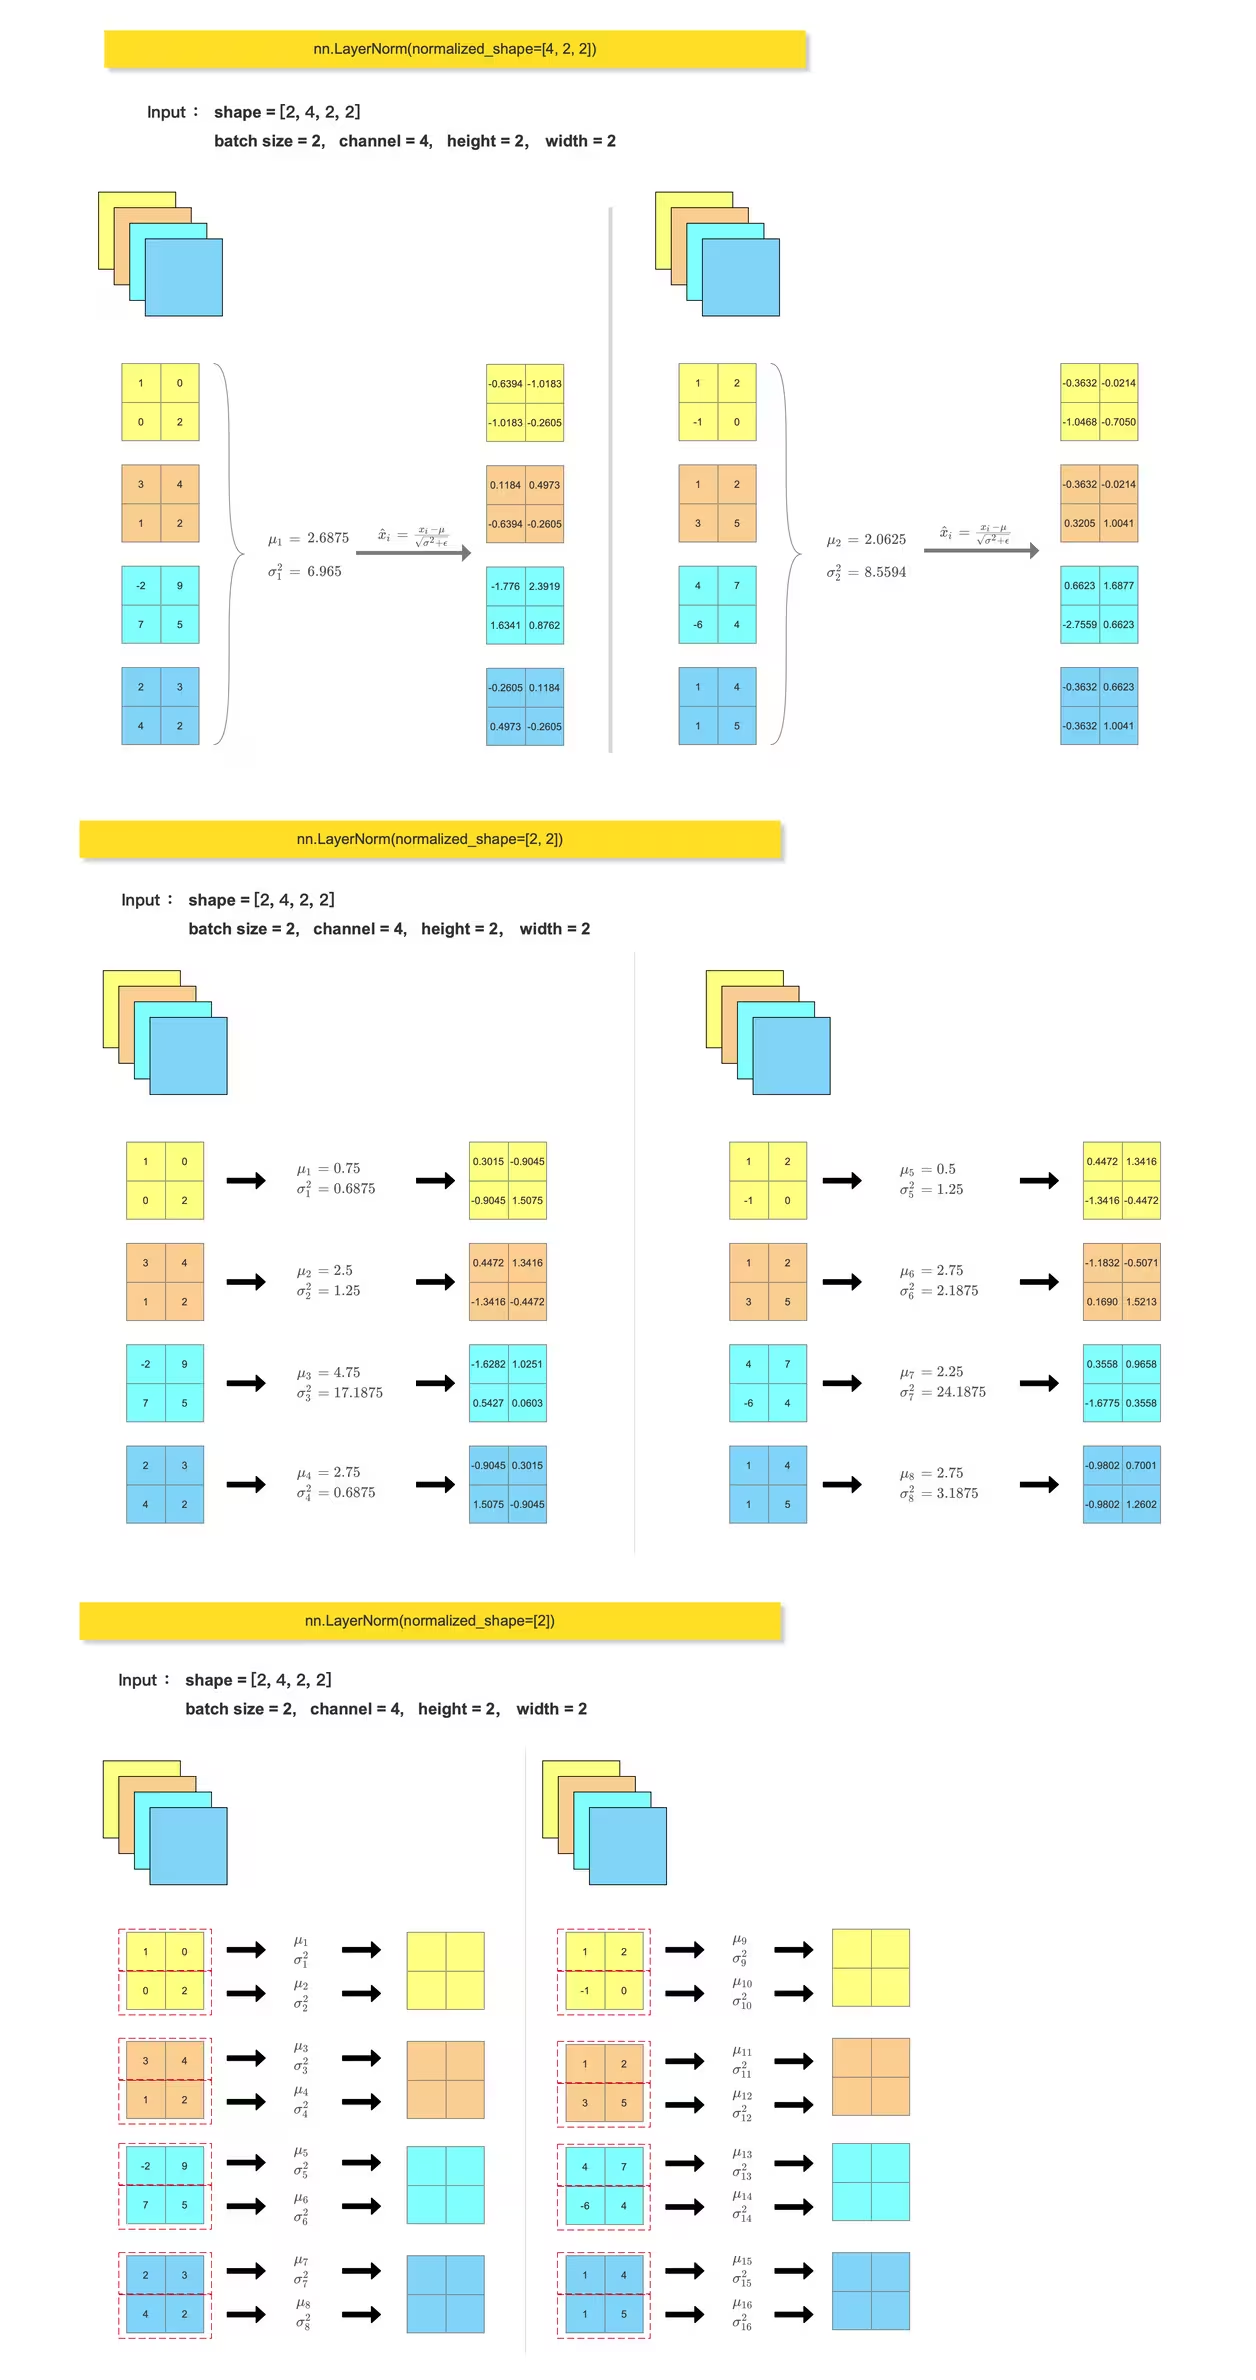